In [1]:
from typing import Optional, Callable, Tuple, List, NoReturn
from functools import partial

import matplotlib.pyplot as plt
import matplotlib.image as img

import numpy as np
import cv2 as cv
import PIL as pil

In [2]:
# User-defined functions, utils module found in the same directory as Erosion.ipynb
from utils import binarise, side_by_side

In [3]:
x = img.imread('imagenes/Im1T4.png')

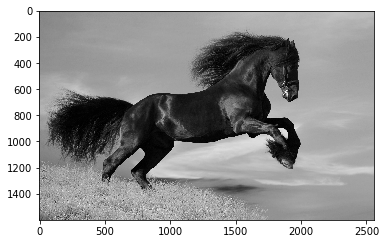

In [4]:
plt.imshow(x, cmap='gray')

In [5]:
x = 1 - x

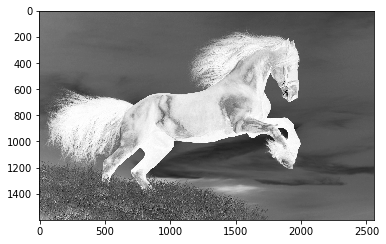

In [6]:
plt.imshow(x, cmap='gray')

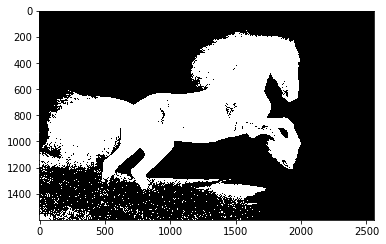

In [7]:
binaria = binarise(x)
plt.imshow(binaria, cmap='gray')

In [9]:
help(cv.dilate)

Help on built-in function dilate:

dilate(...)
    dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst
    .   @brief Dilates an image by using a specific structuring element.
    .   
    .   The function dilates the source image using the specified structuring element that determines the
    .   shape of a pixel neighborhood over which the maximum is taken:
    .   \f[\texttt{dst} (x,y) =  \max _{(x',y'):  \, \texttt{element} (x',y') \ne0 } \texttt{src} (x+x',y+y')\f]
    .   
    .   The function supports the in-place mode. Dilation can be applied several ( iterations ) times. In
    .   case of multi-channel images, each channel is processed independently.
    .   
    .   @param src input image; the number of channels can be arbitrary, but the depth should be one of
    .   CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
    .   @param dst output image of the same size and type as src.
    .   @param kernel structuring element used for dilation; if elem

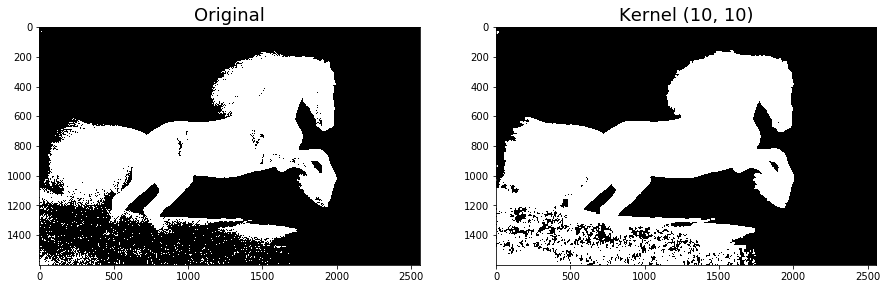

In [10]:
kernel = np.ones((10, 10))
side_by_side(binaria, cv.dilate(binaria, kernel), title1='Original', title2=f'Kernel {kernel.shape}')

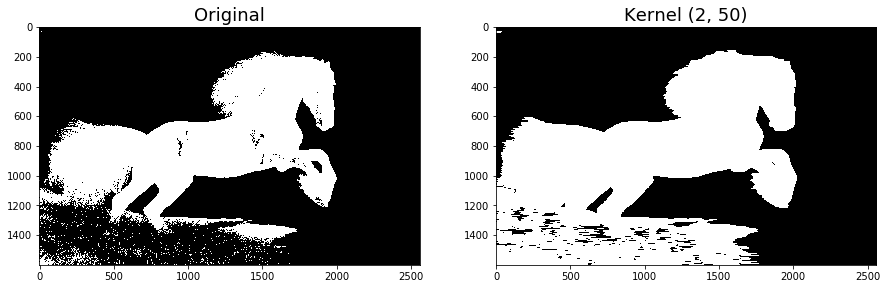

In [13]:
kernel = np.ones((2, 50))
side_by_side(binaria, cv.dilate(binaria, kernel), title1='Original', title2=f'Kernel {kernel.shape}')

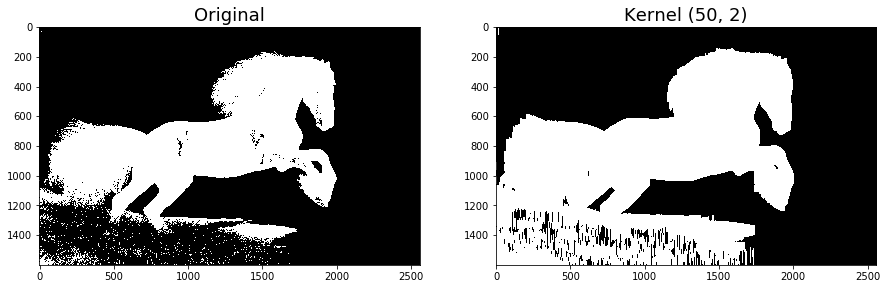

In [14]:
kernel = np.ones((50, 2))
side_by_side(binaria, cv.dilate(binaria, kernel), title1='Original', title2=f'Kernel {kernel.shape}')

# Example found on page 643

In [18]:
text = cv.imread('imagenes/text.png', 0)
text.shape

(525, 794)

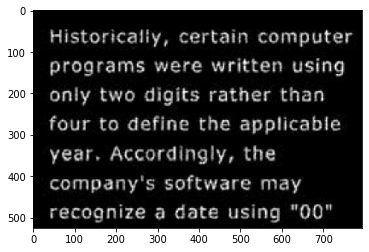

In [19]:
plt.imshow(text, cmap='gray')

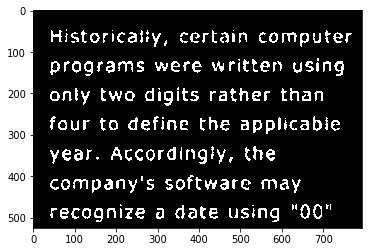

In [31]:
text2 = binarise(text, threshold=115)
plt.imshow(text2, cmap='gray')

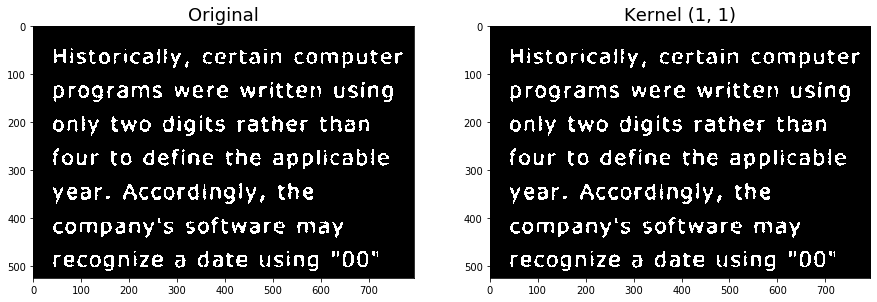

In [37]:
kernel = np.ones((1, 1))
side_by_side(text2, cv.dilate(text2, kernel), title1='Original', title2=f'Kernel {kernel.shape}')

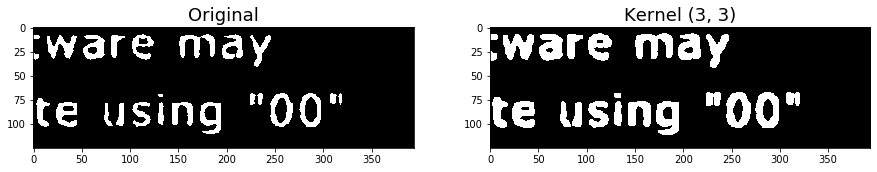

In [43]:
kernel = np.ones((3, 3))
side_by_side(text2[400:, 400:], cv.dilate(text2[400:, 400:], kernel), title1='Original', title2=f'Kernel {kernel.shape}')

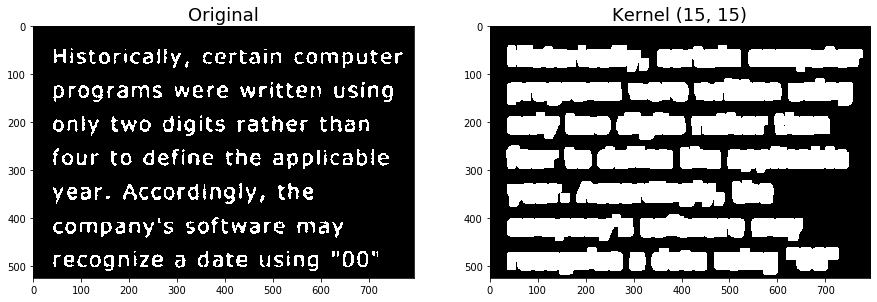

In [41]:
kernel = np.ones((15, 15))
side_by_side(text2, cv.dilate(text2, kernel), title1='Original', title2=f'Kernel {kernel.shape}')